<a href="https://colab.research.google.com/github/Wuichorojas/inteligencia_artificial_LuisR/blob/Master/Perceptron_fuente_datapers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

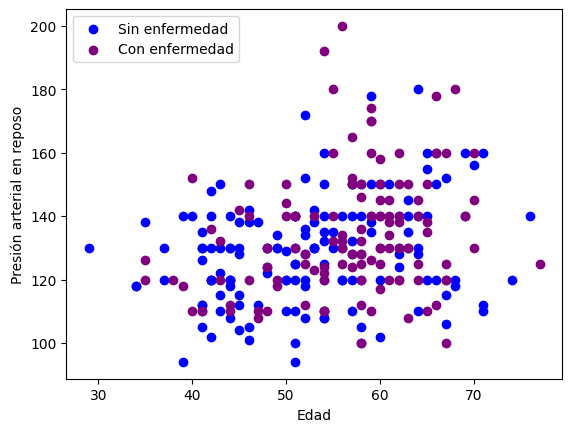

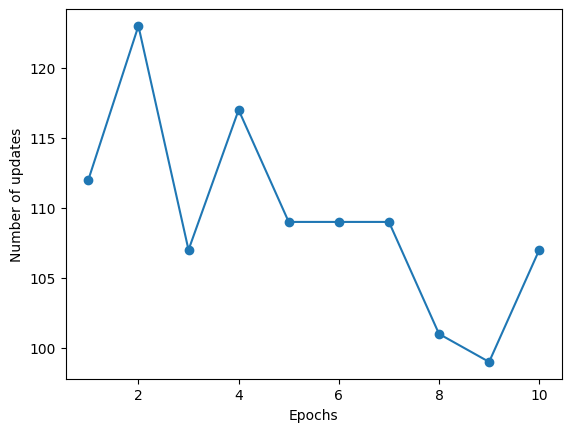

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_states=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_states = random_states

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_states)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


#Cargar el dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/heart/heart.dat'
columnas = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
            'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df = pd.read_csv(url, sep=' ', header=None, names=columnas)

#Caract
X = df.iloc[:, :-1].values

#Etiq
y = df.iloc[:, -1].values

#Convertir 1 a -1 y 2 a 1
y = np.where(y == 1, -1, 1)

#Graficar dos características para visualización
plt.scatter(X[y == -1, 0], X[y == -1, 3], color='blue', marker='o', label='Sin enfermedad')
plt.scatter(X[y == 1, 0], X[y == 1, 3], color='purple', marker='o', label='Con enfermedad')

plt.xlabel('Edad')
plt.ylabel('Presión arterial en reposo')
plt.legend(loc='upper left')
plt.show()

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

#Graficar el número de errores por época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
